In [ ]:
# Importation des différents bibliothèque de travaille

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline




In [ ]:
# importation et chargement du datasets

In [ ]:
data = pd.read_csv('/content/lk_togo_synth_10000.csv')
data.head()

ville_depart ville_arrivee  distance_km  duree_prevue_min  \
0     Atakpamé        Sokodé          180             195.3   
1       Sokodé          Lomé          340             361.3   
2       Sokodé          Kara           90             126.5   
3      Dapaong          Lomé          650             610.9   
4       Tsévié          Lomé           35              61.7   

   retard_observe_min  prix_billet_xof  nb_passagers  capacite_bus   type_bus  \
0                16.5           6320.0          48.0            50   Standard   
1                11.7          13100.0          34.0            50   Standard   
2                39.4           4640.0          32.0            50   Standard   
3                 5.4          26990.0          19.0            45  Climatisé   
4                17.4           2930.0          30.0            45  Climatisé   

  jour_depart periode_depart etat_route  conso_carburant_l  \
0       Lundi           Soir      Bonne              40.83   
1       Jeudi           Midi      Bonne              75.54   
2    Vendredi          Matin   Mauvaise              22.79   
3       Jeudi           Soir      Bonne             169.77   
4       Mardi           Soir      Bonne               9.01   

   prix_carburant_xof_par_l  satisfaction_client_1_5  
0                     762.0                     3.49  
1                     763.0                     4.54  
2                     607.0                     2.98  
3                     722.0                     4.79  
4                     700.0                     4.08

In [ ]:
df = data.copy()

## Les étapes à suivre:

- Exploration de données
- Nettoyage des données
- Sélection des features
- Transformation des features
- Pipeline
- Entraînement du modèle
- Évaluation
- Interprétation



😊 Voici la liste avec les sous-étapes de chaque niveau :

1. *Comprendre le problème*
- 1.1. Définir l'objectif du projet
- 1.2. Identifier les parties prenantes
- 1.3. Comprendre le contexte du problème
2. *Importer les données*
- 2.1. Charger les données dans un format approprié (CSV, Excel, etc.)
- 2.2. Vérifier l'intégrité des données
3. *Explorer les données*
- 3.1. Vérifier les premières lignes du dataset
- 3.2. Vérifier les types de données de chaque colonne
- 3.3. Vérifier les statistiques descriptives (moyenne, écart-type, etc.)
- 3.4. Identifier les variables manquantes
4. *Nettoyer les données*
- 4.1. Gérer les valeurs manquantes
- 4.2. Gérer les valeurs aberrantes
- 4.3. Gérer les doublons
5. *Transformer les données*
- 5.1. Encoder les variables catégorielles
- 5.2. Normaliser les variables numériques
- 5.3. Transformer les variables pour améliorer la distribution
6. *Visualiser les données*
- 6.1. Créer des graphiques pour comprendre les relations entre les variables
- 6.2. Identifier les variables les plus importantes
7. *Sélectionner les variables*
- 7.1. Sélectionner les variables les plus pertinentes pour le modèle
- 7.2. Éliminer les variables redondantes
8. *Créer le pipeline*
- 8.1. Définir les étapes du pipeline (sélection de variables, normalisation, etc.)
- 8.2. Créer le pipeline en utilisant un outil approprié (scikit-learn, etc.)
9. *Diviser les données*
- 9.1. Diviser le dataset en un ensemble d'entraînement et un ensemble de test
- 9.2. Vérifier la représentativité des ensembles
10. *Choisir un modèle*
- 10.1. Sélectionner un modèle de machine learning approprié pour le problème
- 10.2. Vérifier les hypothèses du modèle
11. *Entraîner le modèle*
- 11.1. Entraîner le modèle sur l'ensemble d'entraînement
- 11.2. Vérifier les performances du modèle sur l'ensemble d'entraînement
12. *Évaluer le modèle*
- 12.1. Évaluer les performances du modèle sur l'ensemble de test
- 12.2. Vérifier les métriques de performance (accuracy, précision, etc.)
13. *Optimiser le modèle*
- 13.1. Optimiser les hyperparamètres du modèle
- 13.2. Vérifier les performances du modèle optimisé
14. *Déployer le modèle*
- 14.1. Déployer le modèle dans un environnement de production
- 14.2. Vérifier les performances du modèle en production

Et voilà ! 😊 J'espère que cela aide à clarifier les étapes.



In [ ]:
# Affichage des informations sur le datasets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ville_depart              10000 non-null  object 
 1   ville_arrivee             10000 non-null  object 
 2   distance_km               10000 non-null  int64  
 3   duree_prevue_min          9900 non-null   float64
 4   retard_observe_min        9700 non-null   float64
 5   prix_billet_xof           9900 non-null   float64
 6   nb_passagers              9900 non-null   float64
 7   capacite_bus              10000 non-null  int64  
 8   type_bus                  9950 non-null   object 
 9   jour_depart               10000 non-null  object 
 10  periode_depart            9950 non-null   object 
 11  etat_route                9900 non-null   object 
 12  conso_carburant_l         9700 non-null   float64
 13  prix_carburant_xof_par_l  9900 non-null   float64
 14  satisfa

In [ ]:
# Statistiques descriptive du Datasets
df.describe()

distance_km  duree_prevue_min  retard_observe_min  prix_billet_xof  \
count  10000.000000       9900.000000         9700.000000      9900.000000   
mean     291.957000        313.077616           25.053351     12462.104040   
std      202.809204        192.832703           16.089575      8457.901353   
min       35.000000         36.000000            0.000000      1500.000000   
25%      160.000000        180.200000           12.500000      6210.000000   
50%      210.000000        245.650000           24.300000     10385.000000   
75%      420.000000        431.800000           36.200000     17230.000000   
max     1300.000000        753.600000           83.900000     99390.000000   

       nb_passagers  capacite_bus  conso_carburant_l  \
count   9900.000000   10000.00000        9700.000000   
mean      38.919192      45.69600          73.287914   
std       10.228807       6.62042          51.775895   
min        5.000000      30.00000           6.640000   
25%       32.000000      45.00000          35.857500   
50%       41.000000      50.00000          56.570000   
75%       47.000000      50.00000         104.350000   
max       52.000000      50.00000         230.830000   

       prix_carburant_xof_par_l  satisfaction_client_1_5  
count               9900.000000              9700.000000  
mean                 699.631010                 3.693771  
std                   80.944014                 0.763109  
min                  560.000000                 1.000000  
25%                  630.000000                 3.177500  
50%                  699.000000                 3.730000  
75%                  771.000000                 4.250000  
max                  840.000000                 5.000000

- Ramener la distance_km en float
- nb_passagers en int

In [ ]:
df=df.dropna(subset=['satisfaction_client_1_5'])

In [ ]:
df.isna().sum( )

ville_depart                  0
ville_arrivee                 0
distance_km                   0
duree_prevue_min             95
retard_observe_min          292
prix_billet_xof              96
nb_passagers                 97
capacite_bus                  0
type_bus                     50
jour_depart                   0
periode_depart               49
etat_route                   97
conso_carburant_l           288
prix_carburant_xof_par_l     96
satisfaction_client_1_5       0
dtype: int64

In [ ]:
#df['distance_km'] = df['distance_km'].astype(float)
#df['nb_passagers'] = df['nb_passagers'].astype(int)


In [ ]:
#X = df.drop(columns=['satisfaction_client_1_5'])
#y = df['satisfaction_client_1_5']

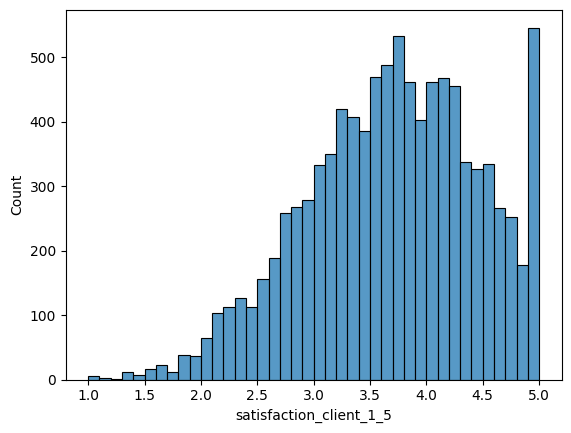

In [ ]:
# Visualisation satisfaction clien
sns.histplot(df['satisfaction_client_1_5'])
plt.show()

In [ ]:
 # 1 = insatisfaction et 0= satisfaction

df['satisfaction_client_1_5'] = (df['satisfaction_client_1_5']<=3).astype(int)
#z = np.where(y <= 3,0,1)


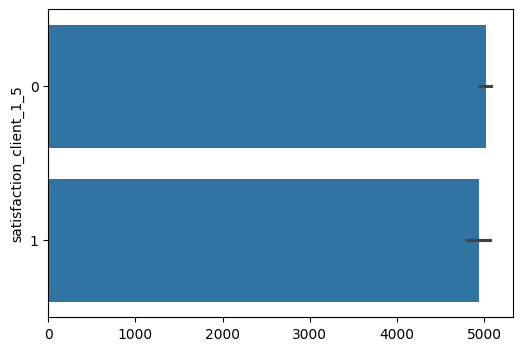

In [ ]:
sat = df['satisfaction_client_1_5'].astype(str)
plt.figure(figsize=(6,4))
sns.barplot(sat)
plt.show()

## Calcul pourcentage valeurs

In [ ]:
df.isnull().sum()/df.shape[0]

ville_depart                0.000000
ville_arrivee               0.000000
distance_km                 0.000000
duree_prevue_min            0.009794
retard_observe_min          0.030103
prix_billet_xof             0.009897
nb_passagers                0.010000
capacite_bus                0.000000
type_bus                    0.005155
jour_depart                 0.000000
periode_depart              0.005052
etat_route                  0.010000
conso_carburant_l           0.029691
prix_carburant_xof_par_l    0.009897
satisfaction_client_1_5     0.000000
dtype: float64

In [ ]:



#sns.heatmap(X.isnull(),annot=True,cmap='coolwarm')
#plt.show()


In [ ]:
# Vérifier si le dataset contient des doublons

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Vérifiaction des incoherences

Verif=df['ville_arrivee'] == df['ville_depart']
Verif.value_counts()


False    9700
Name: count, dtype: int64

In [ ]:
# Visualisation avec boxplots

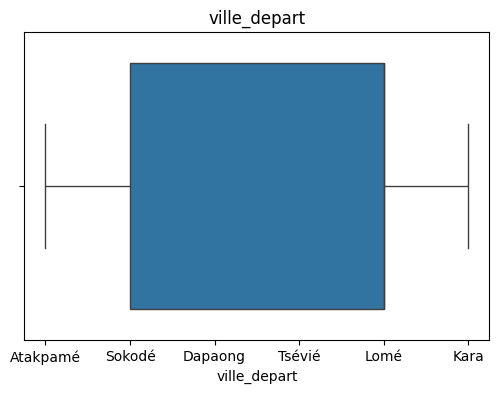

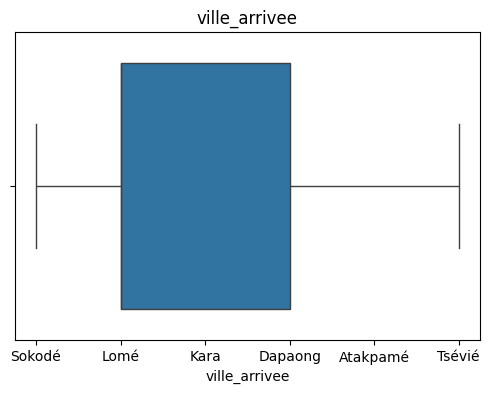

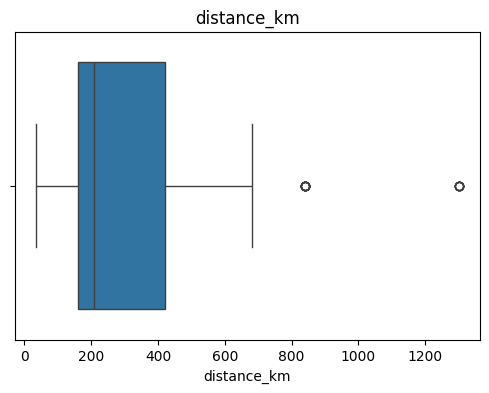

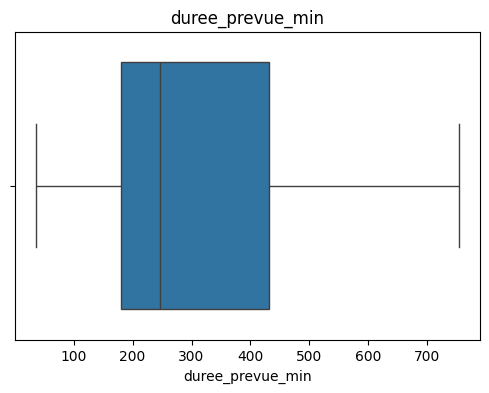

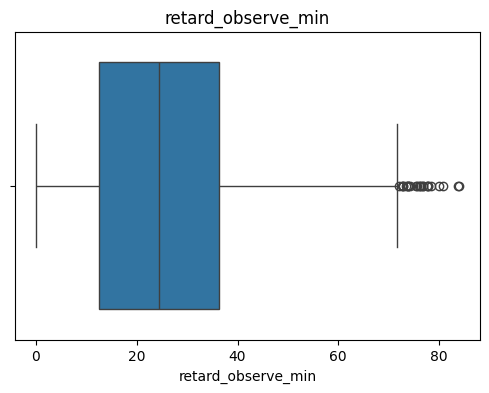

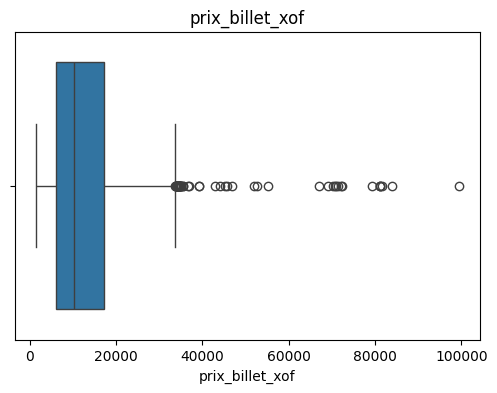

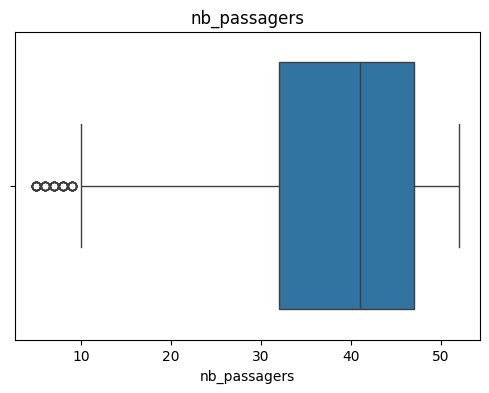

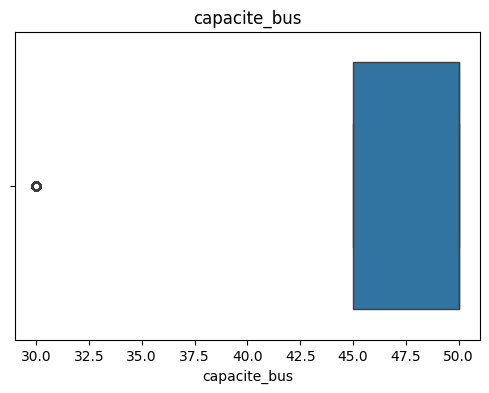

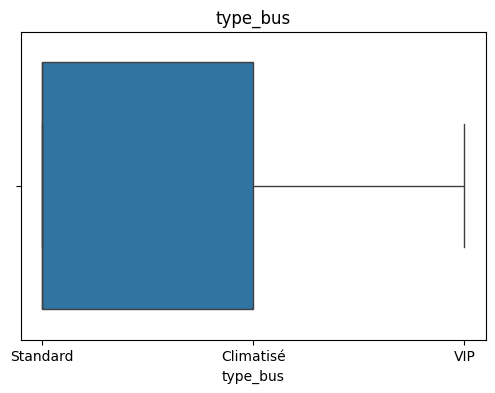

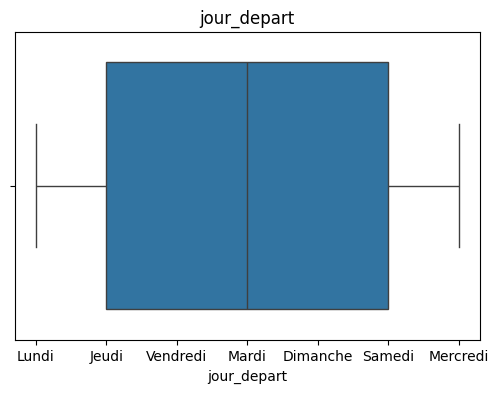

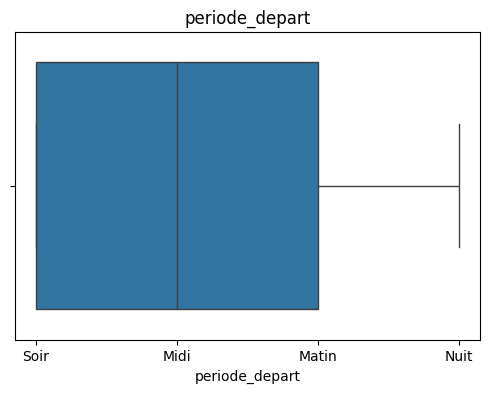

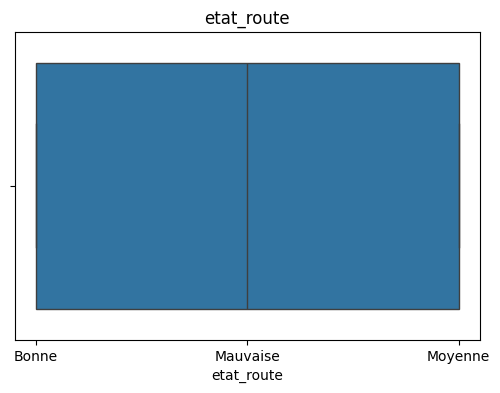

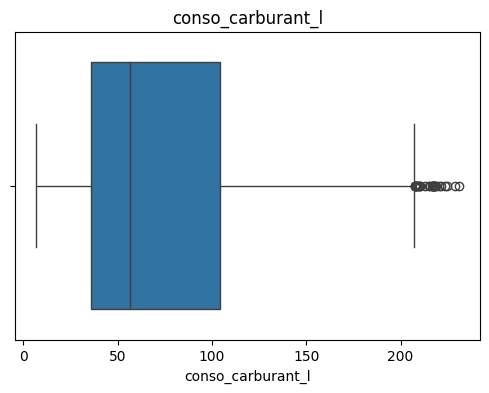

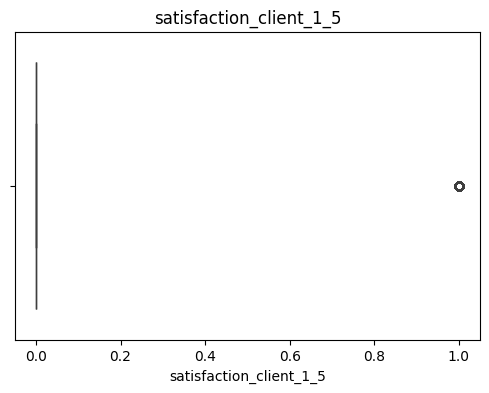

In [ ]:

for col in df.columns:
  plt.figure(figsize=(6,4))
  plt.title(col)
  sns.boxplot(data=df,x=df[col])
  plt.show()

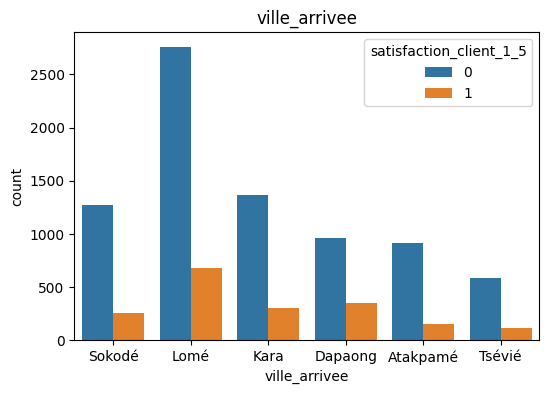

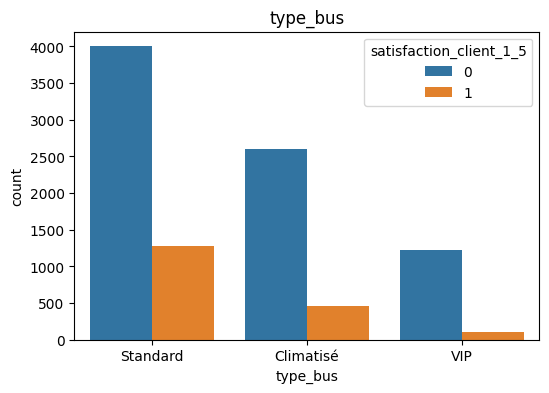

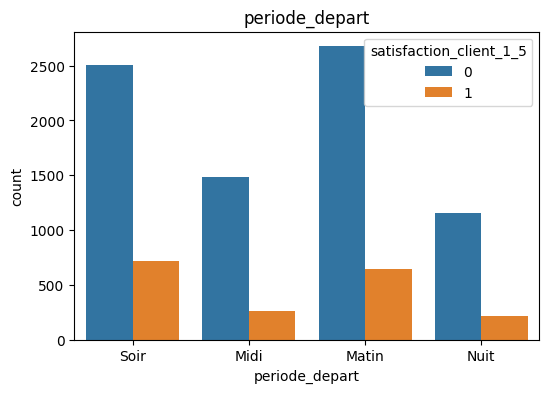

In [ ]:
# visualisation par countplot
for col in df.select_dtypes(include='object').columns:

  plt.figure(figsize=(6,4))
  sns.countplot(data = df,x=df[col],hue='satisfaction_client_1_5')
  plt.title(col)


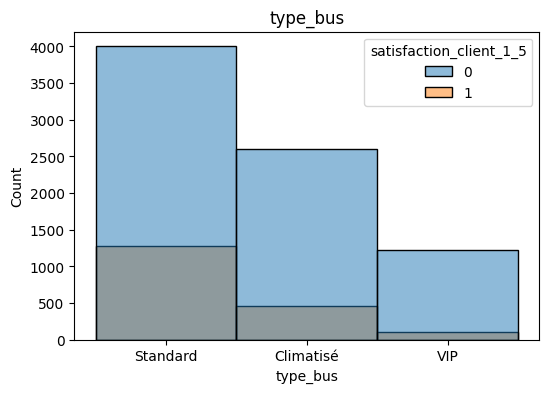

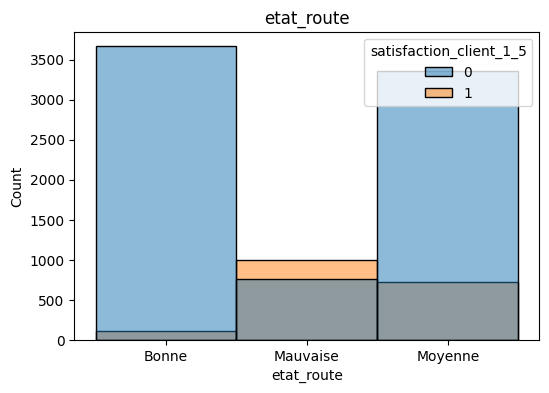

In [ ]:
for col in df.select_dtypes(include='object').columns:

  plt.figure(figsize=(6,4))
  sns.histplot(data = df,x=df[col],hue='satisfaction_client_1_5')
  plt.title(col)

In [ ]:
# visualisation par pairplot

<Figure size 400x200 with 0 Axes>

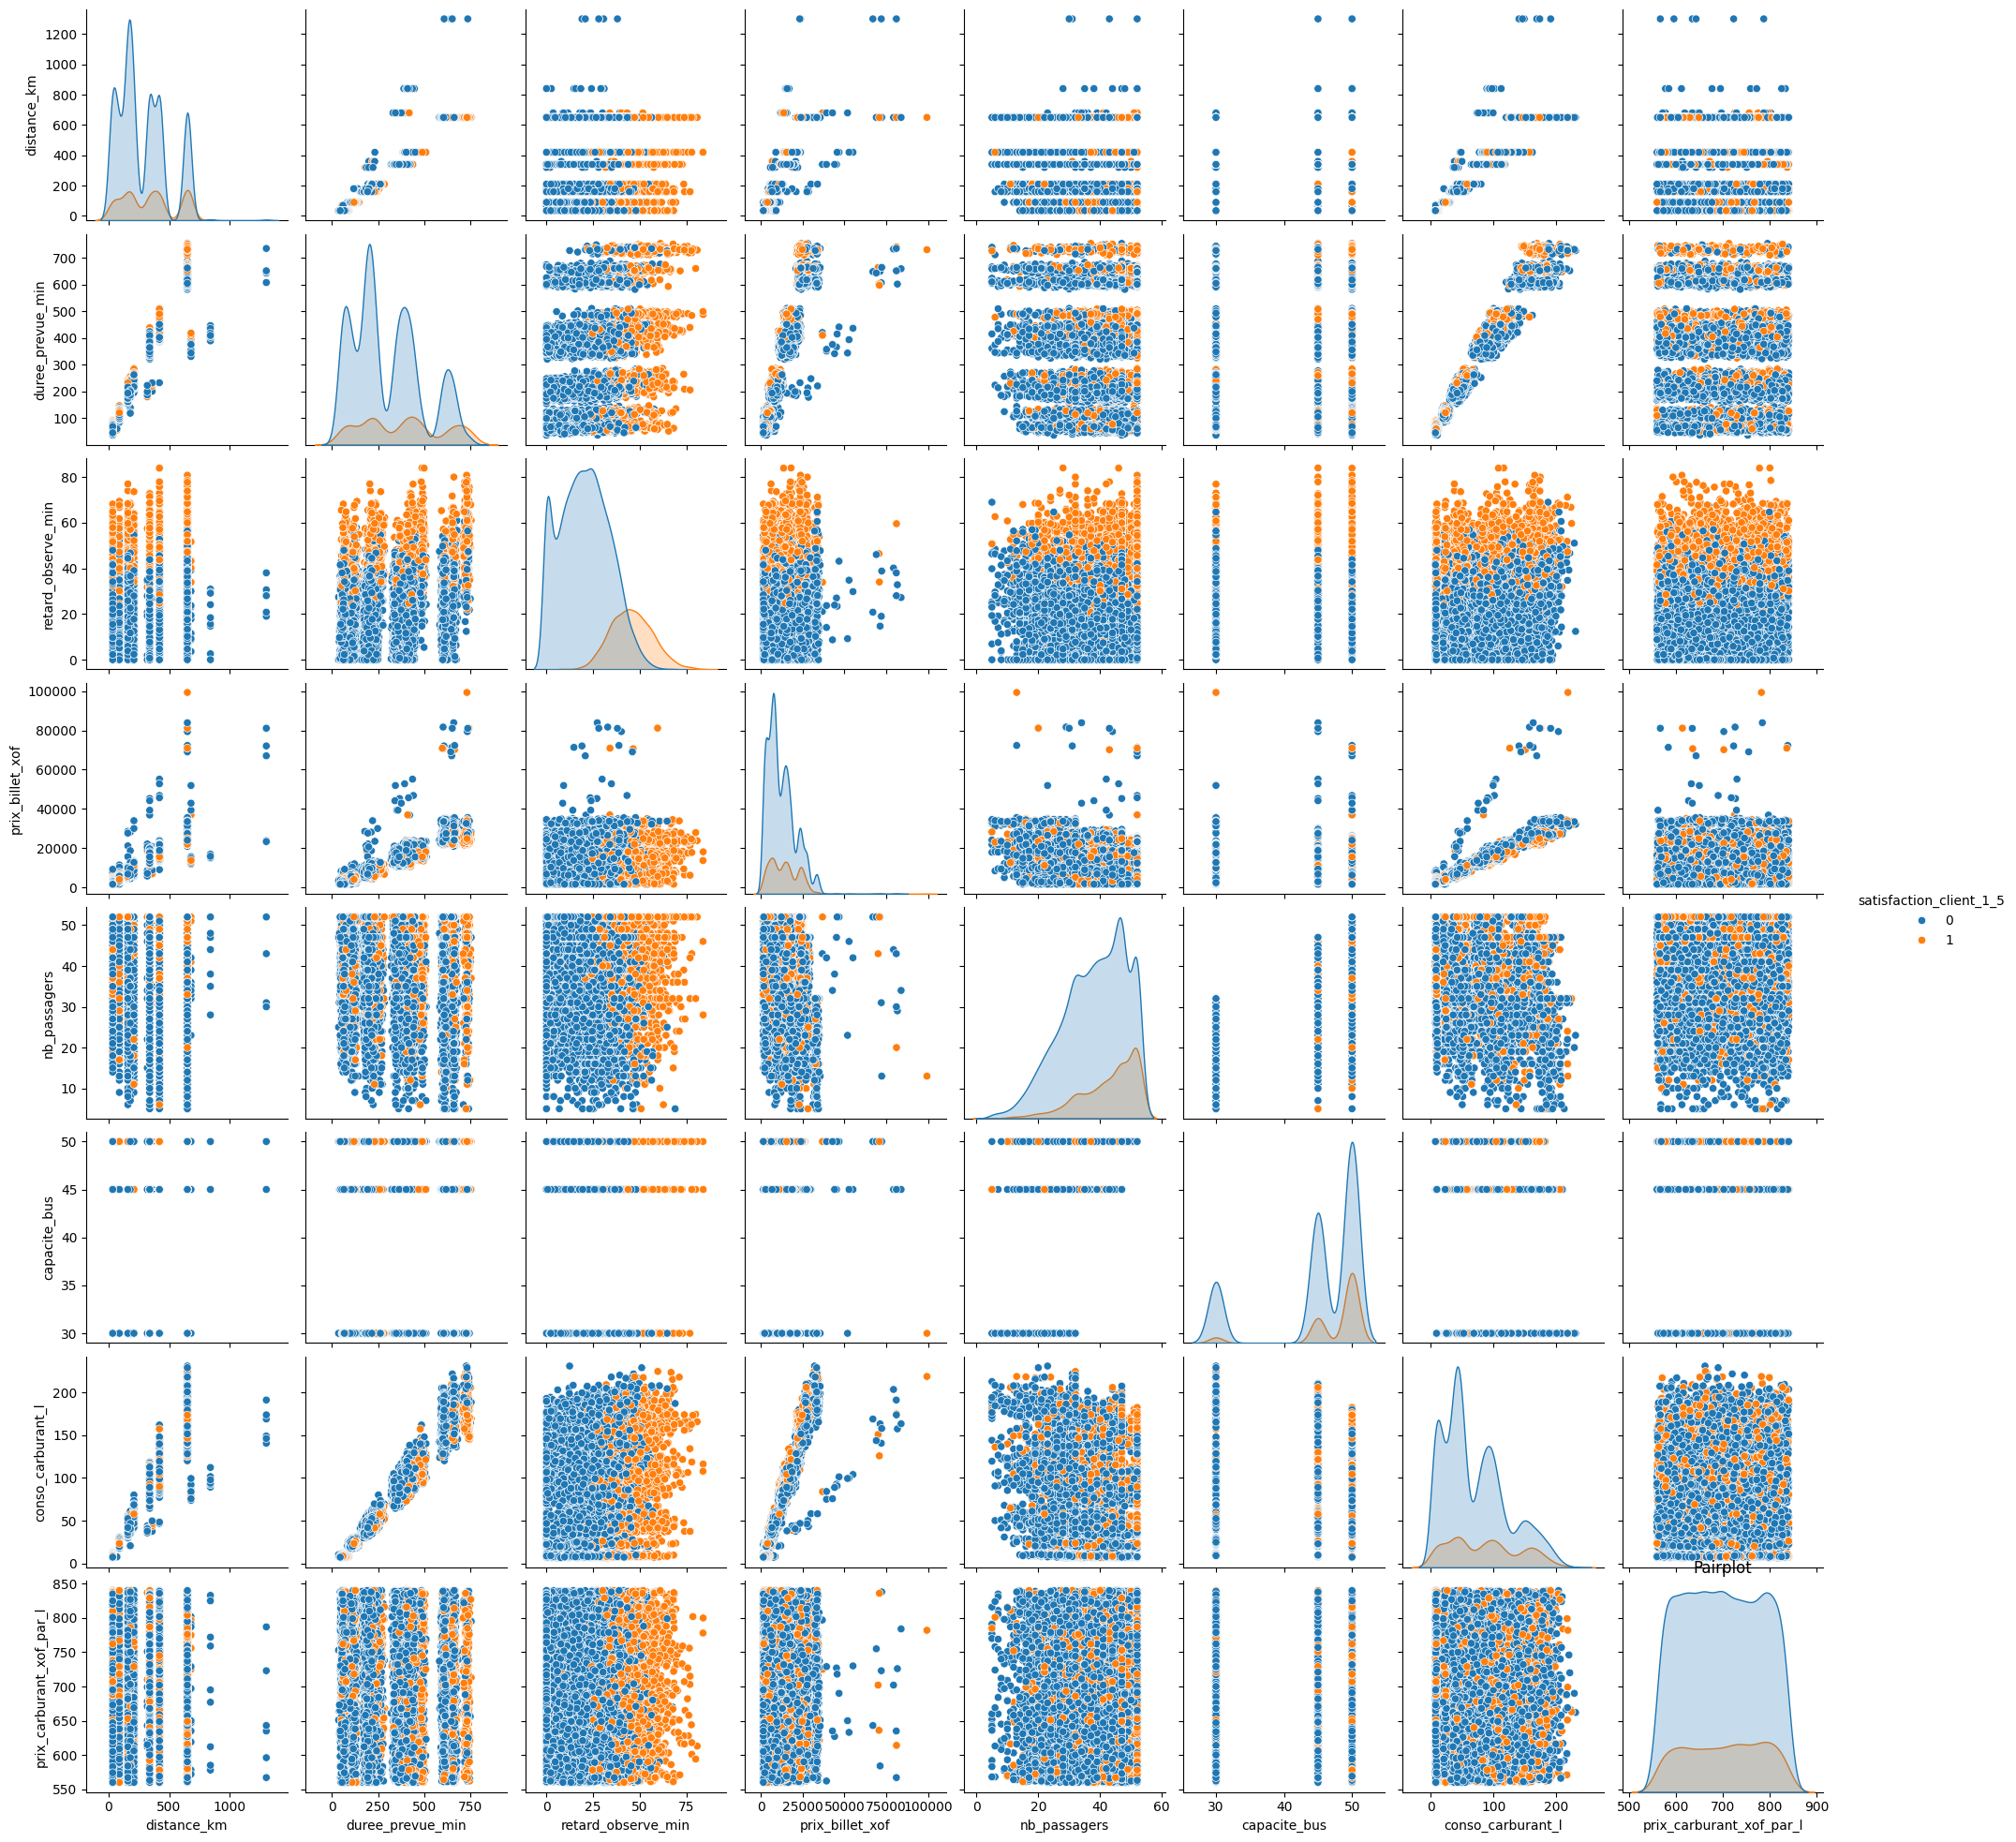

In [ ]:
plt.figure(figsize=(4,2))
sns.pairplot(df,hue='satisfaction_client_1_5')
plt.title('Pairplot')
plt.show()

In [ ]:
#barplot


In [ ]:
# Visualisation par heatmap

<Axes: >

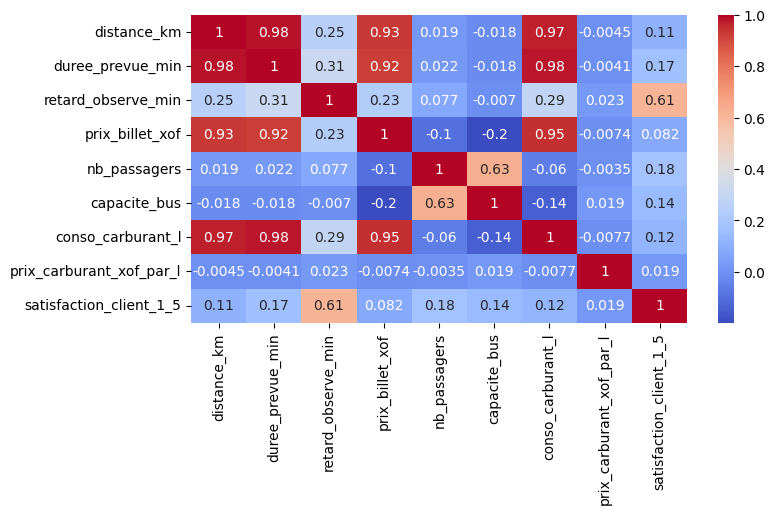

In [ ]:
numeric = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(8,4))
sns.heatmap(df[numeric].corr(), annot=True, cmap='coolwarm')

In [ ]:
# Utilisation de groupby

prix_moyen_type_bus = df.groupby('type_bus')['prix_billet_xof'].mean()
prix_moyen_type_bus

type_bus
Climatisé    12987.559603
Standard     11230.533155
VIP          16263.963134
Name: prix_billet_xof, dtype: float64

In [ ]:
# conso_carburant_l / distance_km
df["conso_km"] = df["conso_carburant_l"] / df["distance_km"]

# distance_km / duree_prevue_min
df["distance_min"] = df["distance_km"] / df["duree_prevue_min"]

#payements effectué par km

df["prix_billet_km"] = df["prix_billet_xof"] / df["distance_km"]


# niveau de chargement
df['niveau_chargement'] = df["nb_passagers"] / df["capacite_bus"]

# retard critique implique nombre de min > 30
df['retard_critique'] = (df['retard_observe_min']> 30 ).astype(int)

# frustration : un retard est t'il mal vécu quand le bus est plein ?
df['frustration'] = df['retard_observe_min'] * df['niveau_chargement']

# niveau de confort
df['niveau_confort'] = df['retard_observe_min'] * df['prix_billet_km']

# Calcul de la marge
#recettes = df['num__prix_billet_xof'] * df['num__nb_passagers']
#couts = df['num__prix_carburant_xof_par_l'] * df['num__conso_carburant_l']

#df['marge'] = (recettes - couts) / recettes

# Varaibles à supprimer
df = df.drop(columns =["conso_carburant_l","duree_prevue_min","prix_carburant_xof_par_l",
              "capacite_bus","ville_depart","ville_arrivee"])

df.head()

distance_km  retard_observe_min  prix_billet_xof  nb_passagers   type_bus  \
0          180                16.5           6320.0          48.0   Standard   
1          340                11.7          13100.0          34.0   Standard   
2           90                39.4           4640.0          32.0   Standard   
3          650                 5.4          26990.0          19.0  Climatisé   
4           35                17.4           2930.0          30.0  Climatisé   

  jour_depart periode_depart etat_route  satisfaction_client_1_5  conso_km  \
0       Lundi           Soir      Bonne                        0  0.226833   
1       Jeudi           Midi      Bonne                        0  0.222176   
2    Vendredi          Matin   Mauvaise                        1  0.253222   
3       Jeudi           Soir      Bonne                        0  0.261185   
4       Mardi           Soir      Bonne                        0  0.257429   

   distance_min  prix_billet_km  niveau_chargement  retard_critique  \
0      0.921659       35.111111           0.960000                0   
1      0.941046       38.529412           0.680000                0   
2      0.711462       51.555556           0.640000                1   
3      1.064004       41.523077           0.422222                0   
4      0.567261       83.714286           0.666667                0   

   frustration  niveau_confort  
0       15.840      579.333333  
1        7.956      450.794118  
2       25.216     2031.288889  
3        2.280      224.224615  
4       11.600     1456.628571

/tmp/ipython-input-524001021.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


<Figure size 600x400 with 0 Axes>

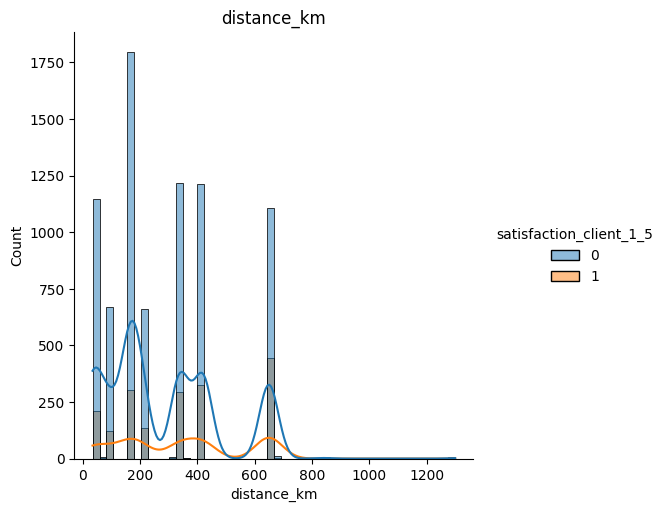

<Figure size 600x400 with 0 Axes>

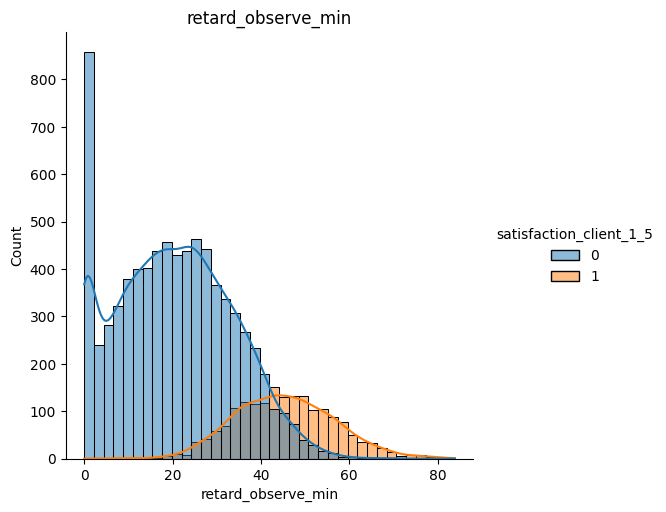

<Figure size 600x400 with 0 Axes>

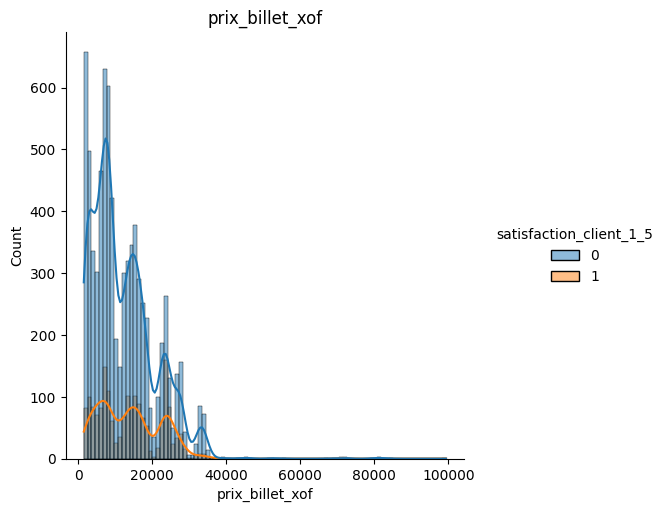

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

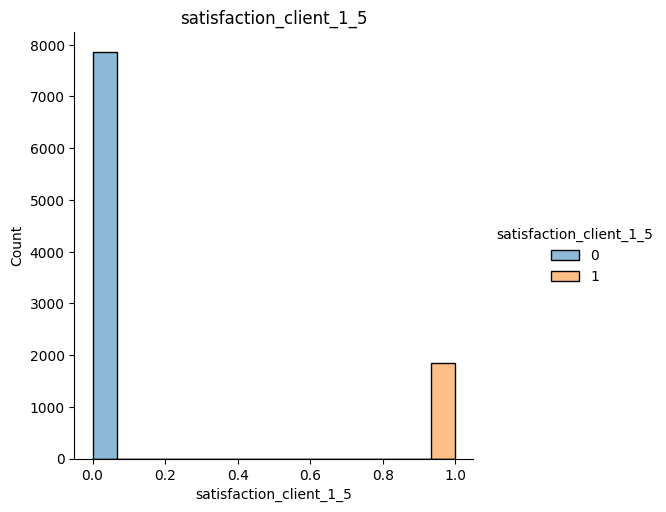

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

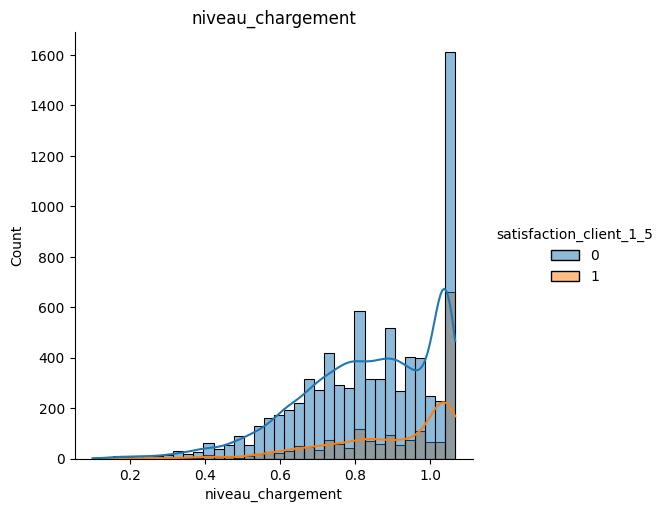

<Figure size 600x400 with 0 Axes>

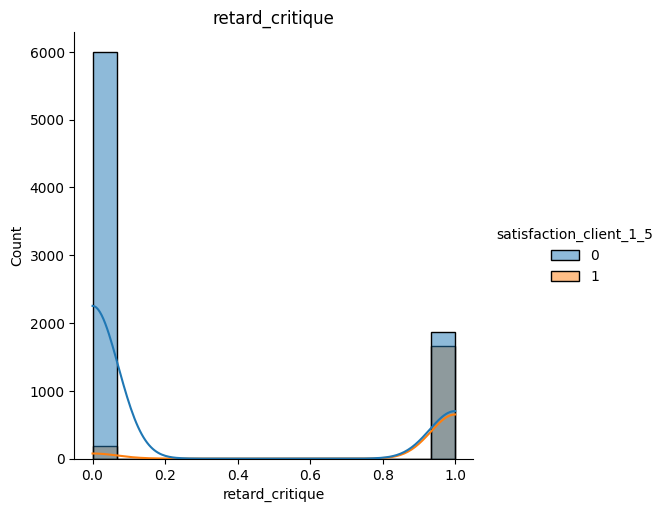

<Figure size 600x400 with 0 Axes>

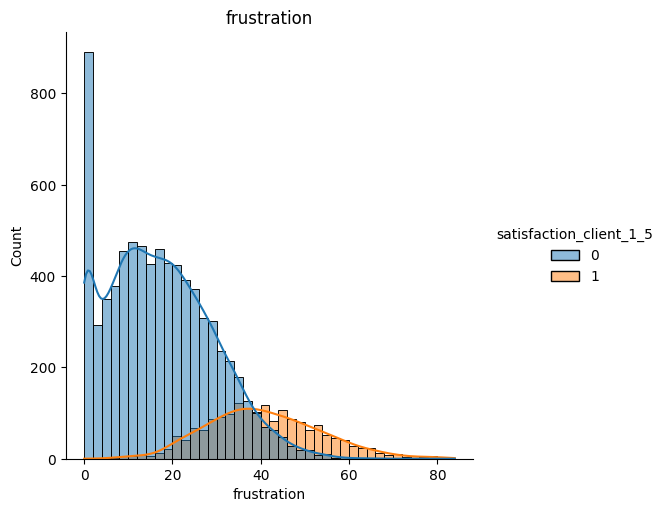

<Figure size 600x400 with 0 Axes>

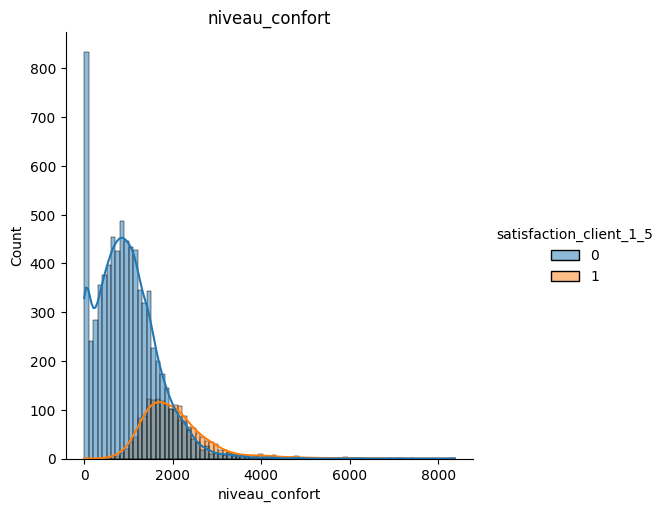

In [ ]:
for col in df.select_dtypes(include='number').columns:

  plt.figure(figsize=(6,4))
  sns.displot(data = df,x=df[col],hue='satisfaction_client_1_5',kde=True)
  plt.title(col)

transfor: distance sqrt + standarscaler
retard observé : standarscaler+ log1p
prix_billet_xof: log1P
nb_passagers: StandardScaler
conso_km:
distance_km :
prix_billet_km: Standarscaler
niveau_chargement:sqrt
retard_critique:
frustation: log1P
niveau_cnfort


In [ ]:
df.columns

Index(['distance_km', 'retard_observe_min', 'prix_billet_xof', 'nb_passagers',
       'type_bus', 'jour_depart', 'periode_depart', 'etat_route',
       'satisfaction_client_1_5', 'conso_km', 'distance_min', 'prix_billet_km',
       'niveau_chargement', 'retard_critique', 'frustration',
       'niveau_confort'],
      dtype='object')

In [ ]:

df['log_retard_observe'] = np.log1p(df['retard_observe_min'])
df['log_prix_billet_km'] = np.log1p(df['prix_billet_km'])
df['log_frustration'] = np.log1p(df['frustration'])
df['log_niveau_confort'] = np.log1p(df['niveau_confort'])


<Figure size 600x400 with 0 Axes>

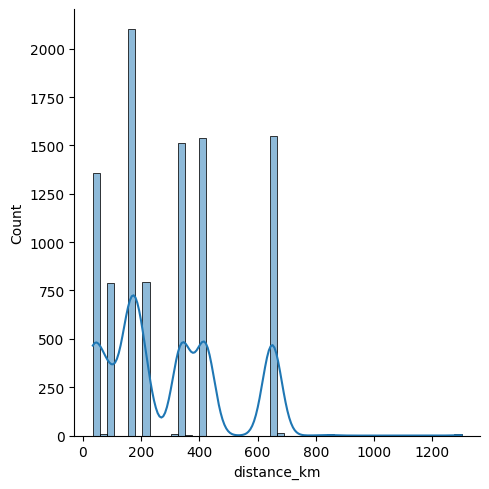

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

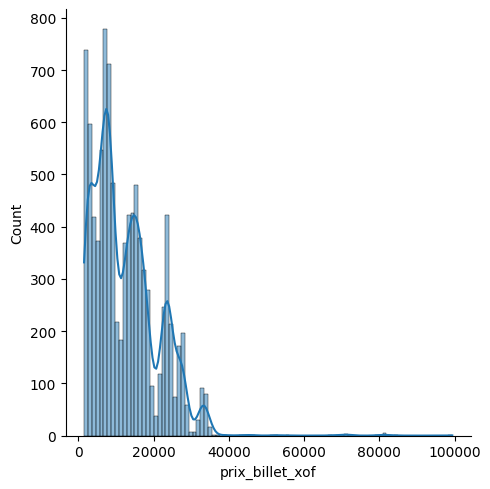

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

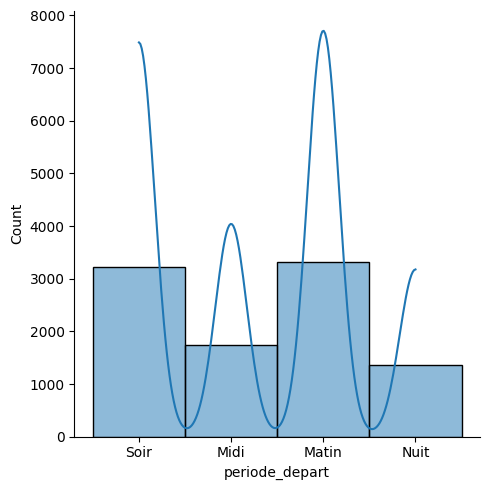

<Figure size 600x400 with 0 Axes>

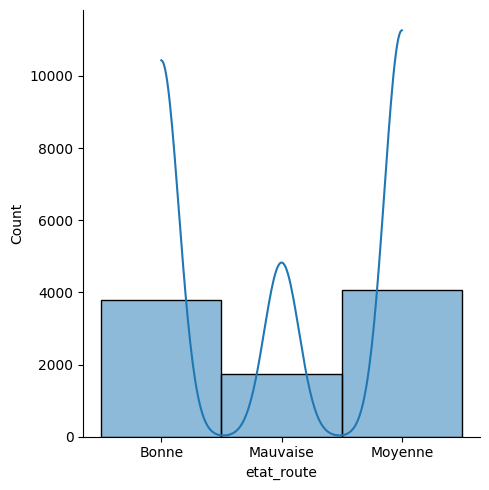

<Figure size 600x400 with 0 Axes>

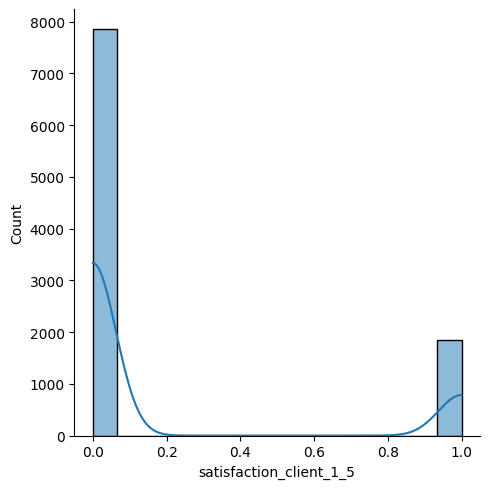

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

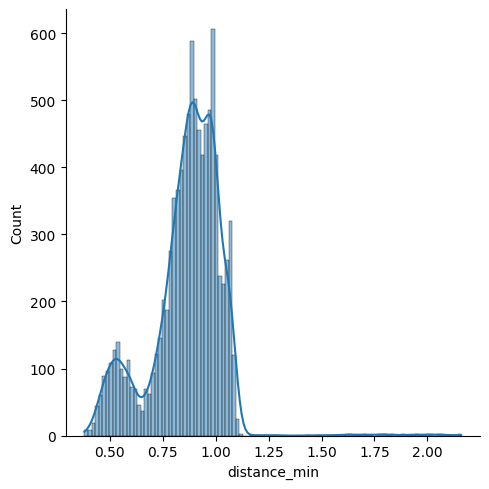

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

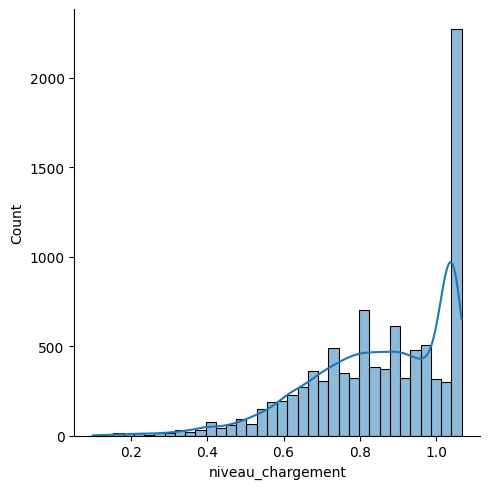

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

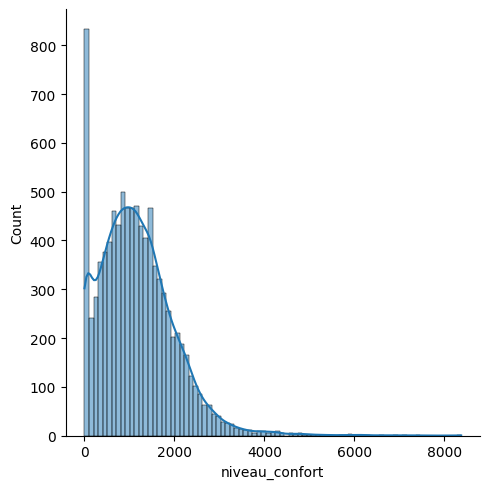

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

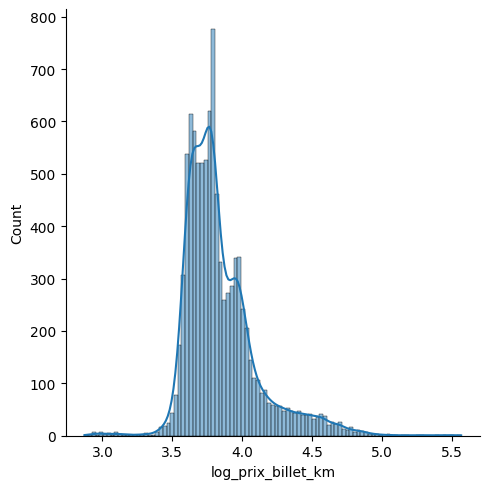

<Figure size 600x400 with 0 Axes>

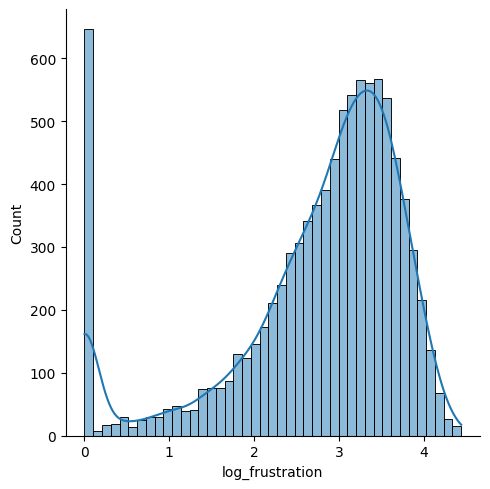

<Figure size 600x400 with 0 Axes>

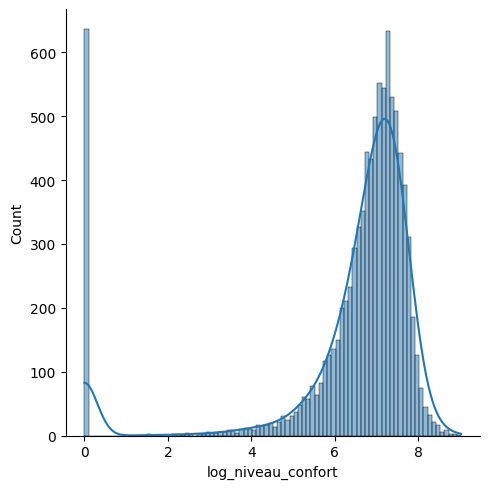

In [ ]:
for col in df.columns:
  plt.figure(figsize=(6,4))
  sns.displot(data=df, x=df[col], kde=True)
  plt.show()

transfor: distance sqrt + standarscaler retard observé : standarscaler+ log1p prix_billet_xof: log1P nb_passagers: StandardScaler conso_km: distance_km : prix_billet_km: Standarscaler niveau_chargement:sqrt retard_critique: frustation: log1P niveau_cnfort

In [ ]:
df.head()

distance_km  retard_observe_min  prix_billet_xof  nb_passagers   type_bus  \
0          180                16.5           6320.0          48.0   Standard   
1          340                11.7          13100.0          34.0   Standard   
2           90                39.4           4640.0          32.0   Standard   
3          650                 5.4          26990.0          19.0  Climatisé   
4           35                17.4           2930.0          30.0  Climatisé   

  jour_depart periode_depart etat_route  satisfaction_client_1_5  conso_km  \
0       Lundi           Soir      Bonne                        0  0.226833   
1       Jeudi           Midi      Bonne                        0  0.222176   
2    Vendredi          Matin   Mauvaise                        1  0.253222   
3       Jeudi           Soir      Bonne                        0  0.261185   
4       Mardi           Soir      Bonne                        0  0.257429   

   distance_min  prix_billet_km  niveau_chargement  retard_critique  \
0      0.921659       35.111111           0.960000                0   
1      0.941046       38.529412           0.680000                0   
2      0.711462       51.555556           0.640000                1   
3      1.064004       41.523077           0.422222                0   
4      0.567261       83.714286           0.666667                0   

   frustration  niveau_confort  log_retard_observe  log_prix_billet_km  \
0       15.840      579.333333            2.862201            3.586601   
1        7.956      450.794118            2.541602            3.677045   
2       25.216     2031.288889            3.698830            3.961871   
3        2.280      224.224615            1.856298            3.750047   
4       11.600     1456.628571            2.912351            4.439284   

   log_frustration  log_niveau_confort  
0         2.823757            6.363603  
1         2.192324            6.113227  
2         3.266370            7.616918  
3         1.187843            5.417098  
4         2.533697            7.284566

In [ ]:
df.columns

Index(['distance_km', 'retard_observe_min', 'prix_billet_xof', 'nb_passagers',
       'type_bus', 'jour_depart', 'periode_depart', 'etat_route',
       'satisfaction_client_1_5', 'conso_km', 'distance_min', 'prix_billet_km',
       'niveau_chargement', 'retard_critique', 'frustration', 'niveau_confort',
       'log_retard_observe', 'log_prix_billet_km', 'log_frustration',
       'log_niveau_confort'],
      dtype='object')

In [ ]:
#distance_km, log_prix_billet_km ,type_bus, nb_passagers, jour_depart, etat_route,
#niveau_chargement, retard_critique,log_frustration, log_niveau_confort,log_retard_observe,satisfaction_client_1_5

In [ ]:
col_garder = ['distance_km','log_prix_billet_km','type_bus',
        'nb_passagers','jour_depart','etat_route','niveau_chargement',
        'retard_critique','log_frustration','log_niveau_confort',
        'log_retard_observe','satisfaction_client_1_5']
df = df[col_garder]

In [ ]:
df.head()

distance_km  log_prix_billet_km   type_bus  nb_passagers jour_depart  \
0          180            3.586601   Standard          48.0       Lundi   
1          340            3.677045   Standard          34.0       Jeudi   
2           90            3.961871   Standard          32.0    Vendredi   
3          650            3.750047  Climatisé          19.0       Jeudi   
4           35            4.439284  Climatisé          30.0       Mardi   

  etat_route  niveau_chargement  retard_critique  log_frustration  \
0      Bonne           0.960000                0         2.823757   
1      Bonne           0.680000                0         2.192324   
2   Mauvaise           0.640000                1         3.266370   
3      Bonne           0.422222                0         1.187843   
4      Bonne           0.666667                0         2.533697   

   log_niveau_confort  log_retard_observe  satisfaction_client_1_5  
0            6.363603            2.862201                        0  
1            6.113227            2.541602                        0  
2            7.616918            3.698830                        1  
3            5.417098            1.856298                        0  
4            7.284566            2.912351                        0

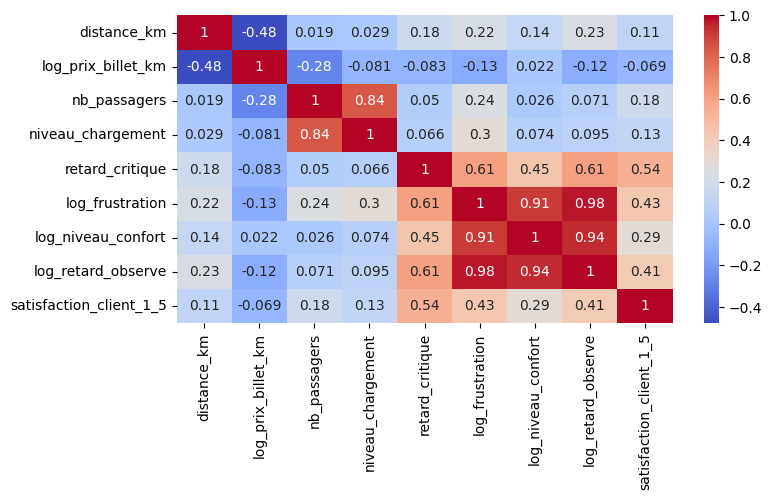

In [ ]:
numeric = df.select_dtypes(include='number').columns
plt.figure(figsize=(8,4))
sns.heatmap(df[numeric].corr(), annot=True, cmap = 'coolwarm')
plt.show()



In [ ]:
df = df.drop(columns= ['nb_passagers','log_niveau_confort','log_retard_observe'])
df.head()

distance_km  log_prix_billet_km   type_bus jour_depart etat_route  \
0          180            3.586601   Standard       Lundi      Bonne   
1          340            3.677045   Standard       Jeudi      Bonne   
2           90            3.961871   Standard    Vendredi   Mauvaise   
3          650            3.750047  Climatisé       Jeudi      Bonne   
4           35            4.439284  Climatisé       Mardi      Bonne   

   niveau_chargement  retard_critique  log_frustration  \
0           0.960000                0         2.823757   
1           0.680000                0         2.192324   
2           0.640000                1         3.266370   
3           0.422222                0         1.187843   
4           0.666667                0         2.533697   

   satisfaction_client_1_5  
0                        0  
1                        0  
2                        1  
3                        0  
4                        0

In [ ]:
df.columns

Index(['distance_km', 'log_prix_billet_km', 'type_bus', 'jour_depart',
       'etat_route', 'niveau_chargement', 'retard_critique', 'log_frustration',
       'satisfaction_client_1_5'],
      dtype='object')

### Construction pipeline



In [ ]:
num_var = ['distance_km', 'log_prix_billet_km','niveau_chargement','log_frustration']
cat_var = ['type_bus', 'jour_depart','etat_route']
bin_var = ['retard_critique']

In [ ]:
y = df['satisfaction_client_1_5']
X = df.drop('satisfaction_client_1_5',axis=1)


In [ ]:
print(X.shape)
print(y.shape)

(9700, 8)
(9700,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7760, 8)
(1940, 8)
(7760,)
(1940,)


### Pipeline  par types de  variables

In [ ]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

In [ ]:
cat_pipeline = Pipeline(steps= [
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [ ]:
bin_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

### Assemblage des pipelines avec ColumnTransformers

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_var),
    ("cat", cat_pipeline, cat_var),
    ("bin", bin_pipeline, bin_var)
],
 remainder='drop'

)



In [ ]:
model_lr = Pipeline(steps=[
    ("process", preprocessor),
    ("lr", LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

### Entrainement du modèle

In [ ]:
print(X_train)

      distance_km  log_prix_billet_km   type_bus jour_depart etat_route  \
7161          420            3.952159        VIP      Samedi      Bonne   
1336          160            3.963191  Climatisé       Jeudi    Moyenne   
9029           35            3.780938   Standard       Mardi   Mauvaise   
460           420            3.822932  Climatisé    Mercredi    Moyenne   
6793          420            3.691851   Standard       Mardi      Bonne   
...           ...                 ...        ...         ...        ...   
1278           90            3.859559  Climatisé    Dimanche    Moyenne   
4830          420            3.599267   Standard       Mardi      Bonne   
2581           90            3.718977   Standard       Lundi   Mauvaise   
2868          210            3.748944  Climatisé      Samedi      Bonne   
1804          650            3.637181   Standard      Samedi    Moyenne   

      niveau_chargement  retard_critique  log_frustration  
7161           1.066667                

In [ ]:
model_lr.fit(X_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance_km',
                                                   'log_prix_billet_km',
                                                   'niveau_chargement',
                                                   'log_frustration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['type_bus', 'jour_depart',
                                                   'etat_route']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['retard_critique'])])),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [ ]:
preprocessor.get_feature_names_out()

array(['num__distance_km', 'num__log_prix_billet_km',
       'num__niveau_chargement', 'num__log_frustration',
       'cat__type_bus_Standard', 'cat__type_bus_VIP',
       'cat__jour_depart_Jeudi', 'cat__jour_depart_Lundi',
       'cat__jour_depart_Mardi', 'cat__jour_depart_Mercredi',
       'cat__jour_depart_Samedi', 'cat__jour_depart_Vendredi',
       'cat__etat_route_Mauvaise', 'cat__etat_route_Moyenne',
       'bin__retard_critique'], dtype=object)

In [ ]:
model_lr.score(X_train,y_train)

0.8509020618556701

In [ ]:
y_pred = model_lr.predict(X_test)



In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_proba = model_lr.predict_proba(X_test)

In [ ]:
y_proba

array([[8.72573044e-01, 1.27426956e-01],
       [9.99987367e-01, 1.26326463e-05],
       [9.87824280e-01, 1.21757195e-02],
       ...,
       [1.31831547e-02, 9.86816845e-01],
       [9.99999964e-01, 3.61829442e-08],
       [6.91161851e-01, 3.08838149e-01]])

In [ ]:
model_lr.score(X_test,y_test)

0.8443298969072165

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1318  253]
 [  49  320]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1571
           1       0.56      0.87      0.68       369

    accuracy                           0.84      1940
   macro avg       0.76      0.85      0.79      1940
weighted avg       0.89      0.84      0.86      1940



# classe 0 satisfait

* 0.96 d'avoir raison
* 0.84 des vrais clients satisfaits
* 0.90 tres bon equilibre

# classe  1 insatisfait


* 0.56 il se trompe 1 sur 2
* 0.87  des vrais clients insatisfaits
* 0.68 correct mais ameliorable

il prefere signaler un client comme insatisfait




In [ ]:
print ('ROC AUC :', roc_auc_score(y_test, y_proba[:, 1]))

ROC AUC : 0.9324787519040053


le recall et le roc auc est plus priviligé dans une classification

features important

In [ ]:
feature_names = model_lr.named_steps['process'].get_feature_names_out()

coefs = model_lr.named_steps['lr'].coef_[0]

odds_ratios = np.exp(coefs)

coef_df = pd.DataFrame ({'feature':feature_names,'coef':coefs , 'odds_ratio': odds_ratios }).sort_values('odds_ratio',ascending = False)

coef_df

feature      coef  odds_ratio
3        num__log_frustration  4.504344   90.408976
12   cat__etat_route_Mauvaise  2.123151    8.357427
4      cat__type_bus_Standard  1.509347    4.523776
13    cat__etat_route_Moyenne  0.980546    2.665912
1     num__log_prix_billet_km  0.530005    1.698941
14       bin__retard_critique  0.326449    1.386037
0            num__distance_km  0.320783    1.378207
7      cat__jour_depart_Lundi -0.113649    0.892571
6      cat__jour_depart_Jeudi -0.169068    0.844451
11  cat__jour_depart_Vendredi -0.224440    0.798963
10    cat__jour_depart_Samedi -0.224870    0.798620
8      cat__jour_depart_Mardi -0.375763    0.686765
9   cat__jour_depart_Mercredi -0.384247    0.680963
2      num__niveau_chargement -0.636932    0.528912
5           cat__type_bus_VIP -1.449002    0.234804

In [ ]:
param_grid = {'lr__C': [0.01,0.1,1,10,100],
              'lr__penalty':['l2'],
              'lr__solver':['lbfgs']}

In [ ]:
grid = GridSearchCV(
    estimator = model_lr,
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv=5,
    n_jobs=1,
)


In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('process',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['distance_km',
                                                                          'log_prix_billet_km',
                                                                          'niveau_chargement',
                                                                          'log_frustration']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          One...
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['type_bus',
                                                                          'jour_depart',
                                                                          'etat_route']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['retard_critique'])])),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=1,
             param_grid={'lr__C': [0.01, 0.1, 1, 10, 100],
                         'lr__penalty': ['l2'], 'lr__solver': ['lbfgs']},
             scoring='roc_auc')

In [ ]:
grid.score (X_test,y_test)

np.float64(0.9324097505774548)

In [ ]:
grid.best_params_

{'lr__C': 100, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}

In [ ]:
best_model = grid.best_estimator_
print(best_model)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance_km',
                                                   'log_prix_billet_km',
                                                   'niveau_chargement',
                                                   'log_frustration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                           

[ 620 1241 1862 2483 3104 3724 4345 4966 5587 6208]


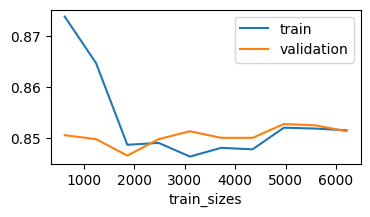

In [ ]:
N , train_score , val_score = learning_curve(best_model,X_train,y_train,
                                             train_sizes=np.linspace(0.1,1,10),cv=5)
print(N)
plt.figure(figsize=(4,2))
plt.plot(N ,train_score.mean(axis=1), label = 'train')
plt.plot(N ,val_score.mean(axis=1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

au debut le model n'est pas en overfiting il a du mal

vers la fin le model est fatigue
donc on doit revenir reajuter les varaiables
ou reduires les anciens variables

- selaectKBest
- choisir les bons hyperparametres pour le GridsearchCV ou elargir le champ de recherche ou utiliser RandomsearchCV
- utiliser randomforesrt , XGboost

## RandomForest

In [ ]:
from joblib.externals.loky.process_executor import MAX_DEPTH
model_rf = Pipeline(steps=[
    ("process", preprocessor),
    ('rf', RandomForestClassifier(
        n_estimators = 3000,
        max_depth=None,
        random_state = 42,
        n_jobs= -1))])

In [ ]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance_km',
                                                   'log_prix_billet_km',
                                                   'niveau_chargement',
                                                   'log_frustration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['type_bus', 'jour_depart',
                                                   'etat_route']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['retard_critique'])])),
                ('rf',
                 RandomForestClassifier(n_estimators=3000, n_jobs=-1,
                                        random_state=42))])

In [ ]:
print('score sur train_set:',model_rf.score(X_train,y_train))
print('score sur test_set:',model_rf.score(X_test,y_test))

score sur train_set: 1.0
score sur test_set: 0.8850515463917525


In [ ]:
y_proba_rf = model_rf.predict_proba(X_test)
y_pred_rf = model_rf.predict(X_test)

In [ ]:
y_proba_rf

array([[6.35666667e-01, 3.64333333e-01],
       [1.00000000e+00, 0.00000000e+00],
       [9.99666667e-01, 3.33333333e-04],
       ...,
       [1.10000000e-01, 8.90000000e-01],
       [1.00000000e+00, 0.00000000e+00],
       [9.51000000e-01, 4.90000000e-02]])

In [ ]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print('ROC_AUC_rf:',roc_auc_score(y_test ,y_proba_rf[:,1]))

ROC_AUC_rf: 0.9262418945004217


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1571
           1       0.74      0.62      0.67       369

    accuracy                           0.89      1940
   macro avg       0.82      0.78      0.80      1940
weighted avg       0.88      0.89      0.88      1940

